### Importing Required Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
from scipy import stats


### Read Database as 'Data'

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head(10)

,age,sex,bmi,children,smoker,charges
0,18,male,33.770,1,no,1725.55230
1,28,male,33.000,3,no,4449.46200
2,33,male,22.705,0,no,21984.47061
3,32,male,28.880,0,no,3866.85520
4,31,female,25.740,0,no,3756.62160
5,46,female,33.440,1,no,8240.58960
6,37,female,27.740,3,no,7281.50560
7,37,male,29.830,2,no,6406.41070
8,60,female,25.840,0,no,28923.13692
9,25,male,26.220,0,no,2721.32080


### d) Found out 5 Point Summary For Given Database

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## a) Finding Shape of Data to Confirm From The Source Details

In [7]:
print(data.shape)
print(data.size)

(1338, 6)
8028


## b) Understanding Data Type of Each Column

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


## c) Cross Checking If There Are Any Null Values In Database



In [9]:
data.isnull().values.any()

False

### e) To Show Distribution of Bmi, Age, children and Charges & Measure of Skewness

### As We Can See The BMI is Almost a Perfect Curve While Charges and Chidren are Rightly Skewed

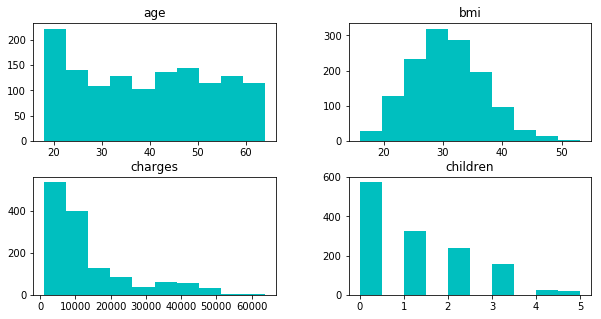

In [10]:
data.hist(figsize=(10,5),color="c",grid=False)
plt.show()

### Measure of Skewness in All Columns

In [11]:
data.skew(axis = 0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

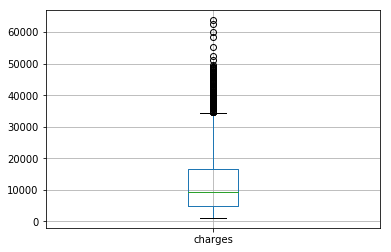

In [12]:
data.boxplot(column='charges')

### g) We Plotted Charges into Boxplot To Understand The Outliers and Found Out That Charges Ranges Between 1500 to 35000. There Are Cases Where The Charges Are Above 35000 Rs

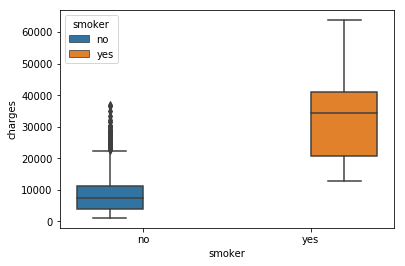

In [13]:
sns.boxplot(y='charges',x='smoker',data=data,hue='smoker')

### ### g) We Plotted Bmi into Boxplot To Understand The Outliers and Found Out That Bmi Is Almost Same In Both Smoker and Non Smoker but The % of People With Extreme Bmi Found in Non Smoker People

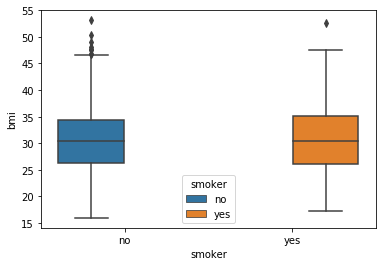

In [14]:
sns.boxplot(y='bmi', x='smoker',hue='smoker',data=data)

### ### g) We Plotted age into Boxplot To Understand The Distribution of Age

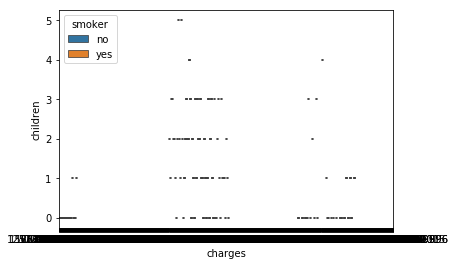

In [15]:
sns.boxplot(y='children',x='charges', hue='smoker',data=data)

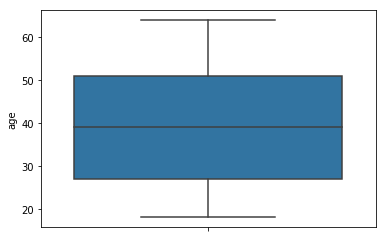

In [16]:
sns.boxplot(y='age',data=data)

### Distribution of Categorical Column but No Relevant Information Found Out

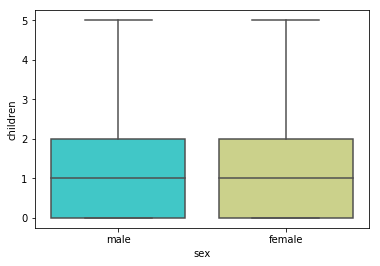

In [17]:
sns.boxplot(x='sex',y='children',data=data,palette='rainbow')


In [18]:
data.head(5)

,age,sex,bmi,children,smoker,charges
0,18,male,33.770,1,no,1725.55230
1,28,male,33.000,3,no,4449.46200
2,33,male,22.705,0,no,21984.47061
3,32,male,28.880,0,no,3866.85520
4,31,female,25.740,0,no,3756.62160


### Pair plot that includes all the columns of the data frame

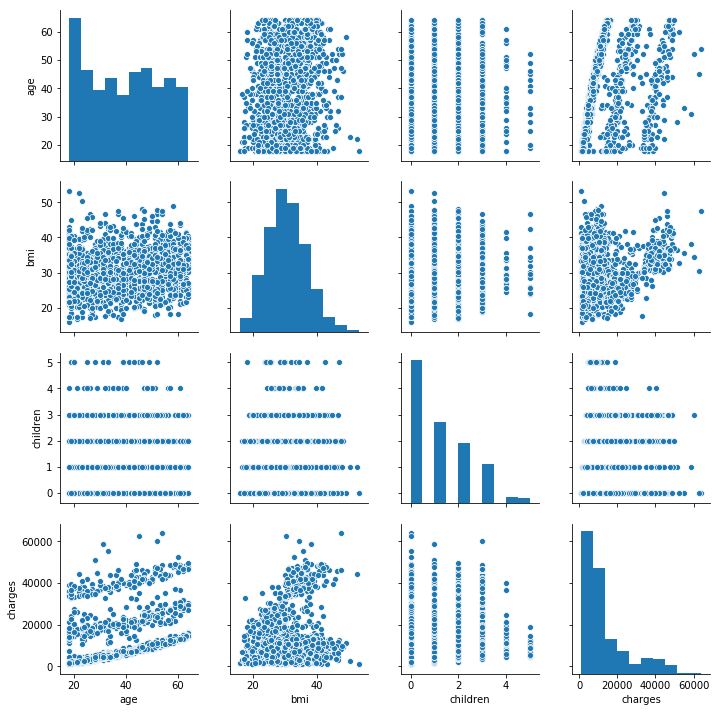

In [19]:
sns.pairplot(data[['age','sex','bmi','children','charges']])

In [20]:
cor = data[['age','sex','bmi','children','charges']].corr()

cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# EDA Completed - 
## Inference - 

## 1. In Dataset of 1338 Rows and 7 Attributes we Found That There Are No Null Or Missing Values in Dataset But The Region Column Has No Significant Use Hence We Dropped The Same.

## 2. BMI is Almost Normally Distributed But The Charges and Children Are Rightly Skewed.

## 3. Insurance Charges In Case of Smoker are Higher Than Non Smoker.

# Hypothesis

### I have Created a New Excel Instead of Using Multiple Sheets as I have Done EDA Part in .CSV. Using Multiple Sheet Might Ask Me To Change The Reading File As Well so, COntinuing WIth The Different File.

#### Sample Code for Multiple Sheet : - data=pd.read_excel("insurance.xlsx",sheet_name=1)

In [78]:
df1 = pd.read_excel('insurance1.xlsx',sheet_name='insurance1')

In [79]:
df1.head(5)

,smokeyes,smokeno
0,1725.55230,16884.9240
1,4449.46200,27808.7251
2,21984.47061,39611.7577
3,3866.85520,36837.4670
4,3756.62160,37701.8768


### a) To Answer This Question We Have To Create Hypothesis as NUll or ALternate Hypothesis
### H0 - No Significant Difference
### Ha - Charges Are Different For Smoker and Non Smoker Hence Have Taken Sample of 274 Items in Different Sheet To Find Out the Answers

In [80]:
### Calculate Sd & Mean for Both Columns

df1.std()

smokeyes     6498.870731
smokeno     11541.547176
dtype: float64

In [81]:
df1.mean()

smokeyes     8632.147082
smokeno     32050.231832
dtype: float64

In [82]:
df1.head(10)

,smokeyes,smokeno
0,1725.55230,16884.92400
1,4449.46200,27808.72510
2,21984.47061,39611.75770
3,3866.85520,36837.46700
4,3756.62160,37701.87680
5,8240.58960,38711.00000
6,7281.50560,35585.57600
7,6406.41070,51194.55914
8,28923.13692,23568.27200
9,2721.32080,39774.27630


### Using T-Test on First Question -  Charges
#### I Pulled Out The Smoker and Non Smoker Charges Data From Source File and Placed Them Adjacent To Each Other Then Used T-Test on Two Numerical Values

In [83]:
from scipy.stats import ttest_ind, iqr
t,p = ttest_ind(df1['smokeyes'],df1['smokeno'])
print("t Value= ",t)

print("P-Value= ",p)

t Value=  -29.265711551250593
P-Value=  6.1712205746577006e-114


In [84]:
if p > 0.05:
	print('There Is No Significant Difference in Charges Who Smokes And Those Who Do Not (Accept H0)')
else:
	print('There Is Significant Difference In Charges of Smoker and Non Smoker (Accept Ha)')

There Is Significant Difference In Charges of Smoker and Non Smoker (Accept Ha)


### Using T Test on 2nd Question - BMI in Male and Female
#### I Pulled Out Sex and Bmi Columns. Replaced Male with 0 and Female with 1, Checked with Info for Datatype Then Used T-Test on sample 

In [122]:
df2 = pd.read_excel('insurance1.xlsx',sheet_name='H-BMI')

In [123]:
df2.head(5)

,sex,bmi
0,0,33.770
1,0,33.000
2,0,22.705
3,0,28.880
4,1,25.740


In [124]:
from scipy.stats import ttest_ind, iqr
t,p = ttest_ind(df2['sex'],df2['bmi'])
print("t Value= ",t)

print("P-Value= ",p)

t Value=  -180.3545295513222
P-Value=  0.0


In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
sex    1338 non-null int64
bmi    1338 non-null float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


In [101]:
if p > 0.05:
	print('BMI of Male Does Not Differ Significantly Than Females (Accept H0)')
else:
	print('BMI of Male Does Differ Significantly Than Females (Accept Ha)')

BMI of Male Does Differ Significantly Than Females (Accept Ha)


### Used Chi-Test As Both The Columns Are Categorical 

In [89]:
df3 = pd.read_excel('insurance1.xlsx',sheet_name='H-Smoker')

In [90]:
df3.head(5)

,sex,smoker
0,male,no
1,male,no
2,male,no
3,male,no
4,female,no


In [91]:
from scipy.stats import chisquare,chi2_contingency
chisquare(df3["sex"].value_counts())

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [92]:
chi = pd.crosstab(df3["sex"],df3["smoker"])
chi

smoker,no,yes
sex,,
female,547,115
male,517,145


In [93]:
chi2_contingency(chi)

(4.025028918449971, 0.04482985128647117, 1, array([[532., 130.],
        [532., 130.]]))

#### test statistic=4.025028918449971
#### p value = 0.04482985128647117
#### degrees of freedom = 1

In [103]:
if 0.04482985128647117 > 0.05:
	print('Proportion of Smoker Is Not Significantly Different In Male and Females (Accept H0)')
else:
	print('Proportion of Smoker Is Significantly Different In Male and Females(Accept Ha)')

Proportion of Smoker Is Significantly Different In Male and Females(Accept Ha)


### Used Anova On 4th Question - Since There Is Requirement of No child, 1-children and 2-Children data I Have Done Below Steps

#### 1. Pulled Out se, bmi and Children Columns.
#### 2. Selected only Female data and then deleted complete sex column.
#### 3. Instead of just one children column i divided it into 0-child,1-children & 2-children and replaced other values with 0 eg- if one female has 1 child then 0-child and 2-children will have 0 value.
#### 4. Proceed with ANOVA

In [109]:
df4 = pd.read_excel('insurance1.xlsx',sheet_name='H-Children')

In [110]:
df4.head(10)

,bmi,0-child,1-children,2-children
0,25.740,0,0,0
1,25.840,0,0,0
2,39.820,0,0,0
3,36.005,0,0,0
4,23.085,0,0,0
5,26.315,0,0,0
6,26.600,0,0,0
7,34.770,0,0,0
8,24.530,0,0,0
9,35.625,0,0,0


In [111]:
from scipy import stats

f,p=stats.f_oneway(df4['0-child'],df4['1-children'],df4['2-children'])

print("F Value= ",f)

print("P-Value= ",p)

F Value=  88.77709424083774
P-Value=  2.169235771192373e-37


In [112]:
if p > 0.05:
	print('distribution of bmi across women with no children, one child and two children is not same (Accept H0)')
else:
	print('distribution of bmi across women with no children, one child and two children is same(Accept Ha)')

distribution of bmi across women with no children, one child and two children is same(Accept Ha)
